In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset from CSV into a pandas DataFrame for analysis
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display basic info about DataFrame structure, column types, and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Replace blank spaces in TotalCharges with 0 and convert the column to float type

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Calculate total number of missing values in the entire DataFrame

df.isnull().sum().sum()

np.int64(0)

In [12]:
# Display summary statistics for numerical columns in the DataFrame

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
#Check Duplicate Values in the Data Set

df.duplicated().sum()

np.int64(0)

In [19]:
df["customerID"].duplicated().sum()    #Check Duplicate Values in a Perticular Column

np.int64(0)

In [27]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 Values of senior Citizen to Yes/No to make it Easier to Understand

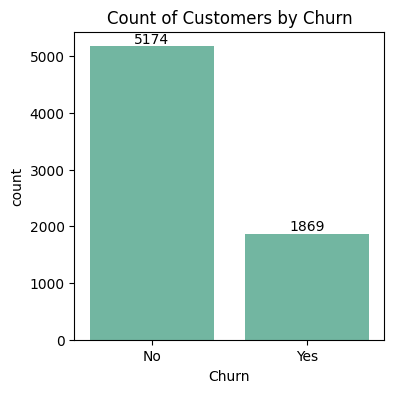

In [65]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Churn", data=df,color="#66c2a5")
ax.bar_label(ax.containers[0])
plt.title ("Count of Customers by Churn")
plt.show()

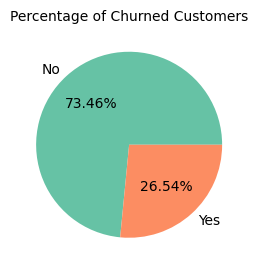

In [70]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg ({"Churn":"count"})
colors = sns.color_palette("Set2")    # Use Set2 color palette
plt.pie (gb["Churn"],labels = gb.index,autopct="%1.2f%%",colors=colors)
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

#From the given Pie-Chart we can Conclude that 26.54% of our Customers have Churned out.
#Now Let's Explore the Reason Behind it.

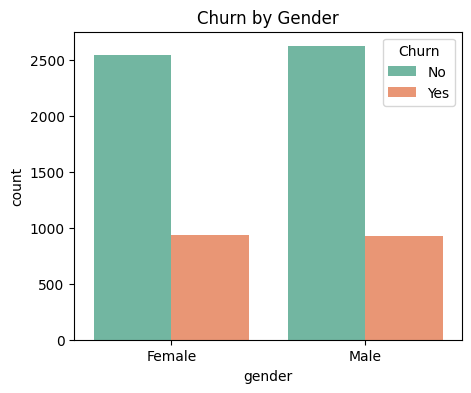

In [60]:
plt.figure(figsize = (5,4))
sns.countplot(x = "gender", data=df, palette="Set2",hue="Churn")
plt.title("Churn by Gender")
plt.show()

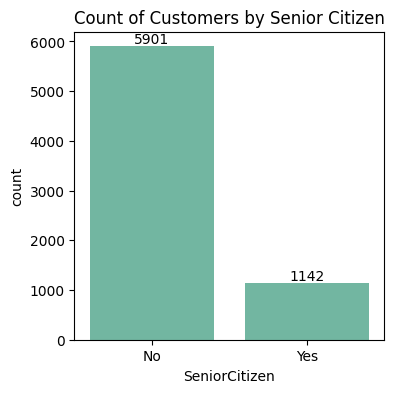

In [71]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data=df,color="#66c2a5")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

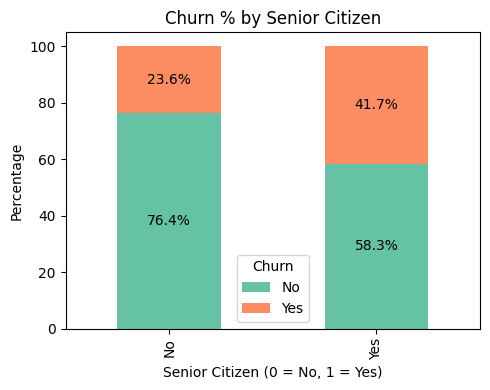

In [72]:
# 1. Create a crosstab of counts
counts = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# 2. Convert counts to percentages row-wise
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Define Set2 colors from Seaborn
set2_colors = sns.color_palette("Set2")

# 4. Plot with custom colors
ax = percentages.plot(kind='bar', stacked=True, figsize=(5,4), color=set2_colors)

# 5. Add % labels on bars
for i, (index, row) in enumerate(percentages.iterrows()):
    cum_sum = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(i, cum_sum + value/2, f"{value:.1f}%", ha='center', va='center', fontsize=10)
            cum_sum += value

# 6. Final touches
plt.title("Churn % by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

#Comparatively a Greater Percentage of people in Senior Citizen Category have Churned.

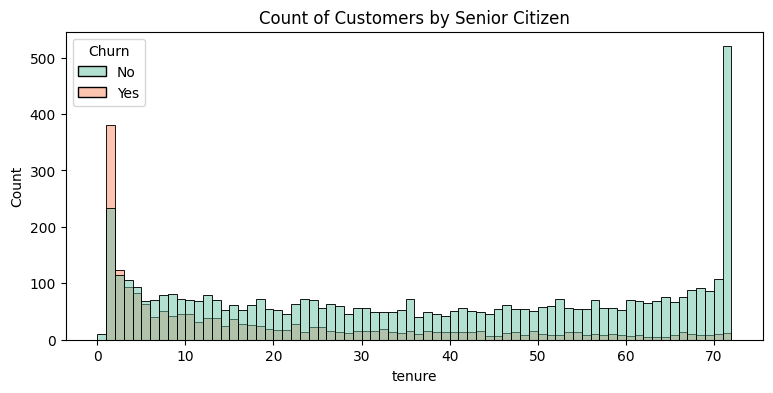

In [53]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",palette="Set2", data=df, bins = 72, hue = "Churn")
plt.title("Count of Customers by Senior Citizen")
plt.show()

#People who have used our Services for a Long time have stayed and people who have used our services 1 or 2 months have Churned

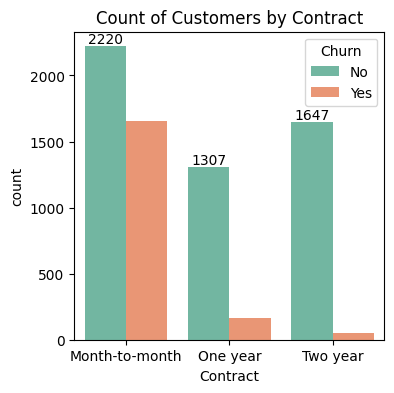

In [54]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",palette="Set2", data=df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have Month-to-Month Contract are Likely to Churn then from those who have 1 or 2 years of Contract.

In [47]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

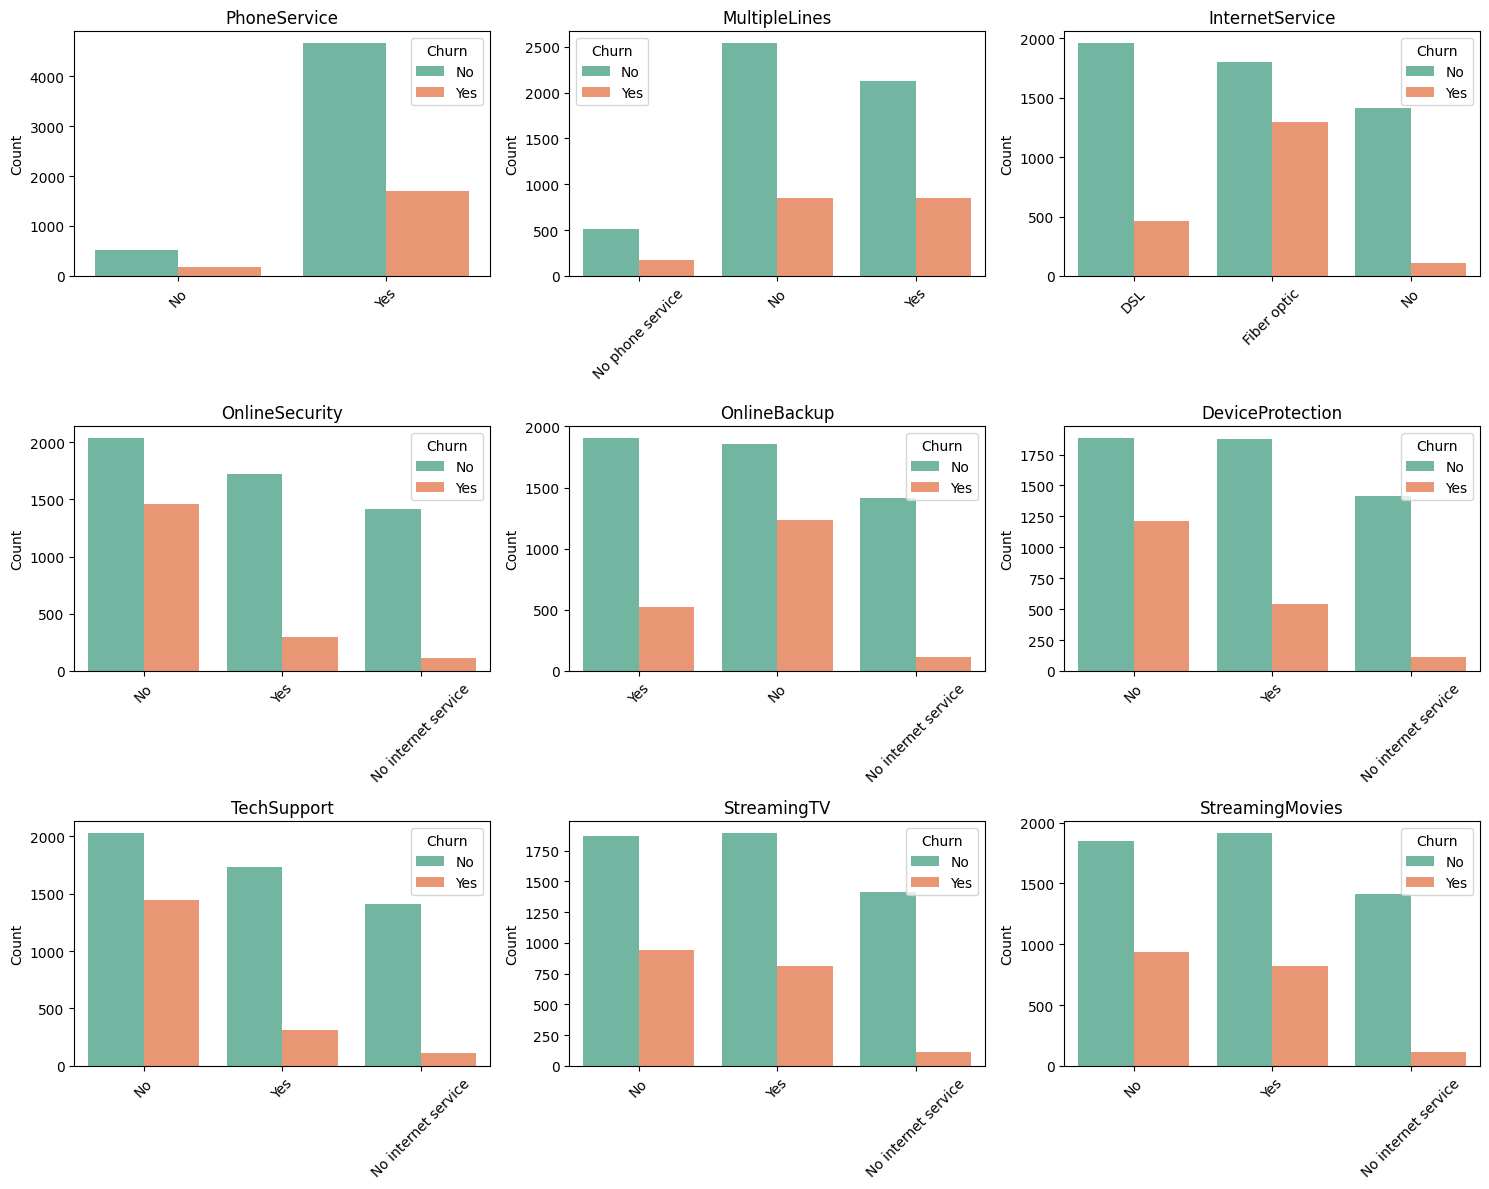

In [49]:
# List of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define number of rows and columns for subplots
n_rows = 3
n_cols = 3

# Set figure size
plt.figure(figsize=(15, 12))

# Create subplots
for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=df, palette="Set2", hue = df["Churn"])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#Customers who lack online services such as OnlineSecurity, TechSupport, and StreamingTV show a higher churn rate compared to those who have them. Notably, customers with Fiber Optic Internet also have a relatively higher churn compared to DSL users. Basic services like PhoneService and MultipleLines show lower churn differences, while "No Internet Service" customers tend to churn less, likely due to limited engagement.

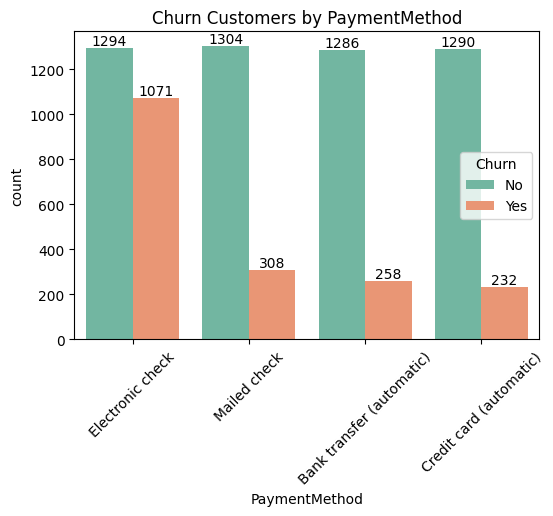

In [62]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data=df, palette="Set2",hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to Churn when he is using Electronic Check as a Payment method.